# Introduction to TensorFlow and Deep Learning

## Structure of this notebook
1. **Sanity check** \[Essential\] <br/> _Run some simple "Hello World" code (1 minute)_
2. **Everything in TensorFlow is part of a graph** \[Essential\] <br/> _Set up some basic calculations to get a feel for what a graph is (20 minutes)_
3. **A simple logistic regression model** \[Essential\] <br/> _Learn one of the fundamental machine learning models for classification and understand how TensorFlow optimises model parameters (30 minutes)_
4. **Extending to muliple classes** \[Essential\] <br/> _Adapt the simple logistic regression model to predict multiple classes and produce a reasonable handwriting recognition tool (30 minutes)_
5. **Generalising to a Multilayer Perceptron (MLP) model** \[Essential\] <br/> _Improve the handwriting recognition tool using a multilayered neural network (30 minutes)_
6. **Neural networks for image data** \[Recommended\] <br/> _Understand the basic components of convolutional neural networks and how they're used on imaging data; implement the LeNet architecture for handwriting recognition (45 minutes)_
7. **Introducing higher-level TensorFlow APIs** \[Recommended\] <br/> _Learn how to apply higher-level APIs to handle data pipelines, training, evaluation and inference (45 minutes)_
8. **\[Bonus material\] Neural networks for sequence data: Ratings from IMDB reviews** \[Optional\] <br/> _A prepared example covering the recurrent neural networks and their application to a text analysis task_

## Setup
Normally, TensorFlow would be loaded by running `import tensorflow as tf` alongside any other packages that are necessary for your application. To help keep this workshop focussed on implementing TensorFlow models, we have wrapped up our dependencies and some helper functions in a handy module called `TutorialSupport`. We've also slightly modified TensorFlow's behaviour so the results are reproducible (by resetting the random seed each time a session is created) and by restricting the number of threads used.

In [ ]:
# Load all libraries and helper functions
%matplotlib inline
from TutorialSupport import *
print("TensorFlow version %s is loaded." % tf.__version__)

## Sanity check
Before we get stuck into the nitty gritty, let's just check that everything is working as expected with the customary "Hello World" code:

In [ ]:
hw = tf.constant("Hello World!", name="sanity_check")
print(hw)

Notice that printing the `hw` variable, when printed, did not show anything at all related "Hello World!". After all, we did just create what _looks_ like a variable that apparently contains "Hello World". It turns out that we can only evaluate values in TensorFlow when running within a "session". Sessions are created as follows:

In [ ]:
with tf.Session() as sess:
    print(sess.run(hw))

By using `sess.run()` and passing in the `hw` variable, we get the expected output: "Hello World!"

**<span style="color:red">If you get any errors with the above code, stop now and check that you have the required TensorFlow dependency installed correctly.</span>**

_**What did we actually do?**_ The above code created a tensor that, when evaluated, always returns a value of "Hello World".

_**What's a tensor?**_ The [TensorFlow documentation](https://www.tensorflow.org/programmers_guide/tensors) describes tensors as "...a generalization of vectors and matrices to potentially higher dimensions." The dimensionality of the tensor is known as its "rank". A rank of zero corresponds to a scalar value, rank one is a vector, rank two is a matrix, rank three is a cube of data, and so on. Vectors and matrices can be operated on using normal mathematical operations, but TensorFlow tensors can contain any data type including text and boolean values. The _shape_ of the tensor can convey both the rank and size of the data, e.g. a tensor of (100, 800, 600, 3) is a rank four tensor that might contain 100 RGB images each with a size of 800x600 pixels.

_**What is a session?**_ A session in TensorFlow defines the context in which computations operate. This might include providing access to GPU (or Google's TPU) accelerators, or even multiple compute nodes, in addition to creating traditional CPU-based threads.

## Everything in TensorFlow is part of a graph
Computation in TensorFlow is performed using a directed graph architecture; dependent operations are linked so that the path to any desired output is known and can be computed on-demand. Let's implement the following graph that adds two integers as an example:
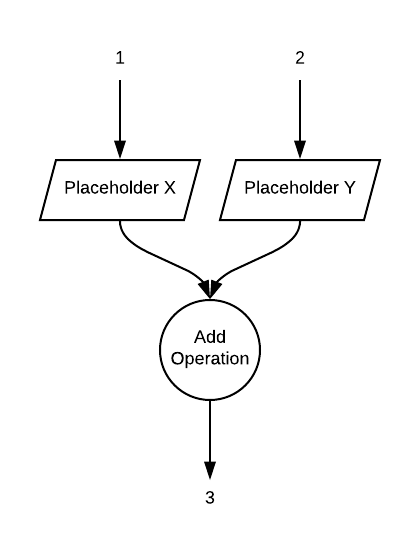

**Remember:** A graph describes _how_ a calculation should be performed but does not actually perform the calculation until required.

Every edge of this graph represents a _tensor_ and every node represents an _operation_. Operations act on tensors, and most operations consume one or mode input tensors to produce an output tensor. Generally, when operations are created, the variable returned is a reference to the output tensor. Evaluating the output tensor triggers all dependent operations to be executed.

### Common types of tensors
#### [tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable)
This kind of tensor represents a value that can change, such as the weights in a regression or neural network. We will use these extensively in the exercises in this notebook.

#### [tf.constant](https://www.tensorflow.org/api_docs/python/tf/constant)
This tensor represents a value that strictly cannot change, such as the value of $\pi$.

#### [tf.placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
This tensor represents a fixed value that we are yet to obtain, such as the training data used to fit a model, or the input data for when a model is used for inference. Placeholder values are supplied on-demand in cases where the graph requires them to compute an output.

#### [tf.SparseTensor](https://www.tensorflow.org/api_docs/python/tf/SparseTensor)
This tensor represents a value where most of its components are zero; it saves space by only storing the overall shape of the data and the indices of the non-zero elements.

### Creating a simple graph
**Challenge:**

Use [`tf.placeholder()`](https://www.tensorflow.org/api_docs/python/tf/placeholder) to create `x` and `y`, and [`tf.add()`](https://www.tensorflow.org/api_docs/python/tf/add) to create `z`, according to the above graph. Make sure that `x` and `y` accept `tf.int32` as their [data type](https://www.tensorflow.org/api_docs/python/tf/DType), and their names are "Placeholder_X" and "Placeholder_Y", respectivley.

**Note on naming:** Nodes in a TensorFlow graph all have names, and TensorFlow will assign a default when none is specified. This is usually okay for small projects, but it can make things difficult in more complex cases.

In [ ]:
x = None
y = None
z = None

In [ ]:
print(x)
print(y)
print(z)

**Expected output:**<br/>
```
Tensor("Placeholder_X:0", dtype=int32)
Tensor("Placeholder_Y:0", dtype=int32)
Tensor("add:0", dtype=int32)
```

Let's now evaluate the tensor `z` as constructed above:

In [ ]:
with tf.Session() as sess:
    print("The value of z when x = 1 and y = 2 is:",
          sess.run(z, feed_dict={x: 1, y: 2}))
    print("The value of z when x = [1,2,3] and y = 1 is:",
          sess.run(z, feed_dict={x: np.array([1,2,3]), y: 1}))
    print("The value of z when x = [1,2,3] and y = [4,5,6] is:",
          sess.run(z, feed_dict={x: np.array([1,2,3]), y: np.array([4,5,6])}))

By evaluating the output tensor `z` using the `sess.run()` function and feeding in placeholder values with the `feed_dict` dictionary, the correct output of `3` is obtained when requesting the value of `z`. The `feed_dict` dictionary maps the input placeholder tensors with values they should hold for the computation.

Notice that the session exists within a python "`with`" block, meaning that the session is automatically closed after the block exits. When running TensorFlow code interactively, it's often useful to create a [`tf.InteractiveSession`](https://www.tensorflow.org/api_docs/python/tf/InteractiveSession) object. By creating this object, we can evaluate the result of operations much more rapidly by calling [`eval`](https://www.tensorflow.org/api_docs/python/tf/Tensor#eval) directly on the tensor. `InteractiveSession` objects should only be used when prototyping TensorFlow models.

In [ ]:
# Create the interactive session, which becomes the default session when calling `eval`
sess = tf.InteractiveSession()

In [ ]:
# Once the session is instantiated, we can simply evaluate the tensor as follows:
z.eval(feed_dict={x:1, y:2})

### Inspecting the graph
You can access the current [graph object](https://www.tensorflow.org/api_docs/python/tf/Graph) using [`tf.get_default_graph()`](https://www.tensorflow.org/api_docs/python/tf/get_default_graph) and a serialised ([what is serialisation?](https://en.wikipedia.org/wiki/Serialization)) version of the graph by calling [`as_graph_def()`](https://www.tensorflow.org/api_docs/python/tf/Graph#as_graph_def) on the graph object:

In [ ]:
# Use tf.get_default_graph() and as_graph_def() to print out a serialised version of the graph
graph = None
graph.as_graph_def()

Each `node` entry describes an object in the graph along with its dependencies. The final `node` in the graph shows that it requires the values provided by `Placeholder_X` and `Placeholder_Y`:
```
...
node {
  name: "add"
  op: "Add"
  input: "Placeholder_X"
  input: "Placeholder_Y"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
...

```

By far the better method to visualise the graph is to use [TensorBoard](https://www.tensorflow.org/programmers_guide/graph_viz), a specialised tool for visualising TensorFlow data, but that is overkill for now! We've written a helper function that can visualise the current graph right here in the notebook. Just run `plot_graph()` to see what we've created so far:

In [ ]:
plot_graph()

As you can see, the current graph contains everything we've created in TensorFlow so far. Even if we've lost the Python reference to the tensor object, we can always find it again by name:

In [ ]:
# Use `get_default_graph()`
graph = None
# Use `get_operation_by_name()`
operation = None
# Use `.outputs[0]` on the operation
first_output = None
first_output.eval()

In the above code, we fetch the operation called "sanity_check", fetch its first (and only) output tensor, and evaluate it using the default session. The expected text, "Hello World!", is printed!

**Challenge:**<br/>
Using the above code as a template, use the `get_operation_by_name()` function to print the result of the `add` operation on a pair of integers of your choice. You will need to reference the placeholders for X and Y.

In [ ]:
graph = None
operation = None
first_output = None
feed_dict = {x: None, y: None}

first_output.eval(feed_dict=feed_dict)

**Challenge:**<br/>
Create a graph that calculates the area of a circle from its radius (remember that $A=\pi r^2$) as well as its circumference (remember that $C=2\pi r$). Use the `plot_graph()` function to visualise the graph. Ensure that the placeholders use data type `tf.float32` and that every operation is given a name.
You can get the value of $\pi$ from the [`math`](https://docs.python.org/3/library/math.html#math.pi) module. Take a look at the [TensorFlow Python API](https://www.tensorflow.org/api_docs/python/tf) to find an operation that can square $r$ - there are more than one.

In [ ]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [ ]:
import math

# Convert math.pi to a TensorFlow constant
pi = tf.constant(math.pi, name="pi")

r = None # Radius: A placeholder of type tf.float32 with name "radius"
r2 = None # Some TensorFlow operation accepting `r` as in input that calculated r^2 (hint: tf.square)
two_pi = None # Some TensorFlow operation multiplying pi by 2 (hint: tf.multiply)
a = None # Area: Some TensorFlow operation multiplying r2 and pi
c = None # Circumference: Some TensorFlow operation multiplying two_pi and r

In [ ]:
plot_graph()

In [ ]:
area, circumference = sess.run([a, c], feed_dict={r: 10})
print("A circle with a radius of 10 has an area of", area, "and a circumference of", circumference)
print("The value of 2 * pi is", two_pi.eval())

**Expected output:**<br/>
```
A circle with a radius of 10 has an area of 314.15927 and a circumference of 62.831856
The value of 2 * pi is 6.2831855
```

Notice that we can use our session object (`sess`) to request the value of multiple tensors by providing a list as the first argument. Only one `feed_dict` is required if any of the values requested depends on a placeholder value.

## A simple logistic regression model
<hr/>
**TL;DR** Logistic regression is a method of squashing a multiple linear regression that can produce any value from $-\infty$ to $+\infty$ to values between 0 and 1. We can interpret the output of logistic regression if optimise our parameters using a maximum likelihood estimation to evaluate our model.
<hr/>
While in traditional multiple linear regression model esimates a target value $y$ as $\hat{y} = w_0 + w_1x_1 + \cdots + w_nx_n$ where $w$ is a set of trainable weights (note that $w_0$ acts as a bias term), a logistic regression model extends this formulation to constrain $\hat{y}$ to take values between $[0, 1]$ such that $\hat{y}$ can be interpreted as the probability of some class membership, or more formally $\Pr(Y=1\vert X=x;w)$ (one way of reading this might be: the probability datapoint drawn from $X$, described by a set of values, $x$, belongs to class $Y=1$ given parameters $w$).

Logistic regression is based on the sigmoid function, $\sigma(t)$:
$$\sigma(t)=\frac{1}{1+e^{-t}}$$

In logistic regression, $t$ is known as the _logit_ and is defined as the logarithm of the odds ratio, or $\log\left(\frac{p}{1-p}\right)$. It is this component that is modelled using the standard multiple linear regression model:

$$t = \log\left(\frac{p}{1-p}\right) \approx w_0 + w_1x_1 + \cdots + w_nx_n = \textbf{w}^\texttt{T}\textbf{x}$$

In short, the sigmoid function, $\sigma$, acts on the logit function $t$ to recover the probability, $p$.

Now that we have a method of approximating the probability of a data point ($X$) belonging to a class ($Y=1$), we need to find suitable parameters $w$ that _increases the probability of our observed data given the classes $y$_, or more formally, maximises $\Pr(X|Y)$. Since logistic regression assumes only two mutually exclusive outcomes are possible, the [_Bernoulli distribution_](https://en.wikipedia.org/wiki/Bernoulli_distribution) can be used. The probability for an individual data point, $y_i$, can therefore be described as:

$$\Pr(Y=y_i|X=x_i) = \sigma(t_w(x_i))^{y_i}(1-\sigma(t_w(x_i)))^{1-y_i}$$

In terms of the Bernoulli distribution, $\sigma(t_w(x_i))$ might be defined more generally in other texts as the "probability of success". It can be seen that for $y_i=1$, the probability reduces to $\Pr(y_i=1|X=x_i)=\sigma(t_w(x_i))$ and for $y_i=0$ it reduces to $\Pr(y_i=1|X=x_i)=1-\sigma(t_w(x_i))$.

With this information we can estimate the likelihood of the entire dataset's observations, $x$, having their associated classes $y$ as the product of each individual datapoint's probability:

$$L(w)=\Pi^n_{i=1}\sigma(t_w(x_i))^{y_i}(1-\sigma(t_w(x_i)))^{1-y_i}$$

We want to maximise the value of $L(w)$, and this approach is called the [_maximum likelihood estimation_](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) (in practise, we minimise $-L(w)$).

An equivalent and more convenient expression used in optimising this model is obtained by taking the log of the likelihood function above, $L$, to transform the product over all datapoints to a sum:
$$\ell(w) = \log(L(w)) = \sum^n_{i=1}y_i\log(\sigma(t_w(x_i))) + (1-y_i)\log(1-\sigma(t_w(x_i)))$$

Maximising $L$ is equivalent to maximising $\ell$!

All that is left is to find the derivative of $\ell$ with respect to parameters $w$ and iteratively solve through some form of [_gradient descent_](https://en.wikipedia.org/wiki/Gradient_descent). Finding the derivative is not covered here because TensorFlow can automatically differentiate and optimise objective functions! We call these objective functions _loss functions_.

Gradient descent is an iterative procedure where the derivative of the loss function (shown as $J$ here) is used to update the weights by a tiny amount (shown as $\eta$) so that the loss function is minimised until some stopping criterion is met:

$$\textbf{w}_{t+1} = \textbf{w}_{t} - \eta \frac{\partial J}{\partial \textbf{w}}$$

### Classifying red or white wine with logistic regression
#### Building the logistic regression graph

Your challenge is to create the compute graph for the logistc regression model and then apply it to a dataset of features belonging to red and white wines. The model should be able to use these features to classify the wine as red or white.

There are 12 variables in [this dataset](http://archive.ics.uci.edu/ml/datasets/Wine+Quality):
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 
12. quality (score between 0 and 10)
13. red (1) or white (0)

<span style="font-size:x-small">Cortez, Paulo, et al. "Modeling wine preferences by data mining from physicochemical properties." _Decision Support Systems_ 47.4 (2009): 547-553.</span>

All variables apart from the quality measure will be the predictors ($x$) and only the final variable will be the dependent variable ($y$).

### Take a look at the data

In [ ]:
load_wine_data().head()

### Creating the model
**Steps:**<br/>
1. Create two [placeholders](https://www.tensorflow.org/api_docs/python/tf/placeholder) for the `x` and `y` variables - both should have their data type set to `tf.float32`, and they will have shapes of `(None, 11)` and `(None, 1)`, respectively.$^\textbf{*}$
2. Create two `tf.float32` variables (matrices) using [tf.get_variable](https://www.tensorflow.org/api_docs/python/tf/get_variable) to create the weights ($w_1 \cdots w_n$) and the bias ($w_0$). Ensure that the weights and bias are both initialised with zeros (using [tf.zeros](https://www.tensorflow.org/api_docs/python/tf/zeros)) having shapes `(11, 1)` and `(1,)`, respectively
3. Calculate the logits by multiplying your `x` placeholder and weights using [tf.matmul](https://www.tensorflow.org/api_docs/python/tf/matmul) and add the bias
4. Transform the logits back into probabilities using [tf.sigmoid](https://www.tensorflow.org/api_docs/python/tf/sigmoid) (this will provide our final predictions)
5. Create the MLE objective function (also our ["loss function"](https://en.wikipedia.org/wiki/Loss_function)), $\ell$ in the notes above, using [tf.losses.sigmoid_cross_entropy](https://www.tensorflow.org/api_docs/python/tf/losses/sigmoid_cross_entropy)
6. Set up a gradient descent optimiser with a learning rate of 0.001 that minimises your loss function using [tf.train.GradientDescentOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer)
7. Create an "init op" that can be called to initialise the weights and bias using [tf.global_variables_initializer](https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer)

$^\textbf{*}$Remember that when `None` is specified as part of a tensor shape, it represents a dimension of unknown size. We use that for the first dimension of our input data, which represents the index of each example fed into the model for training/inference. Since the amount of data we input is not known in advance (and can change), we leave it as `None`.

**Things to note:**
* `tf.get_variable` is the recommended way to create `tf.Variable` tensors; it will create the variable if none exists by the name given, and either raise an error that the variable exists or return a reference to that variable if it does. This is not so important now, but useful in cases [where variables need to be shared](https://www.tensorflow.org/programmers_guide/variables#sharing_variables).
* The initialisation operation (`tf.global_variables_initializer`) must be created and run before any training takes place. Its job is to set the values of the variables created in step two to their defaults. If this step is missed, you will encounter an error because the variables will have no value assigned to them.
* We have supplied a tensor that calculates the model accuracy for you. It might look complicated, but it just adds up all cases where both $y$ and $\hat{y}$ are $ > 0.5$. Even though $y$ can take on only 0 or 1, we use the $> 0.5$ condition to avoid any issues with comparing floating point numbers.

In [ ]:
tf.reset_default_graph() # Start with a fresh graph and session
sess = tf.InteractiveSession()

In [ ]:
x = None # [Step 1] Hint: tf.placeholder(dtype=DATA TYPE, shape=SHAPE OF DATA, name=NAME OF TENSOR)
y = None # [Step 1]

weights = None # [Step 2] Hint: tf.get_variable(NAME, dtype=DATA TYPE, initializer=tf.zeros(SHAPE OF DATA))
bias = None # [Step 2]

logits = None # [Step 3]

y_hat = None # [Step 4]

loss = None # [Step 5]

# The first dimension is the number of training examples
total_examples = tf.shape(y)[0]
# This is a boolean tensor where correct = True, incorrect = False
correct_predictions = tf.equal(y_hat > 0.5, y > 0.5)
# After converting boolean (True/False) to integer (1/0) values, add them using `tf.reduce_sum`
# and divide by the total number of examples
accuracy = tf.reduce_sum(tf.cast(correct_predictions, tf.int32)) / total_examples

# Add in the training and initialisation operations
train_op = None # [Step 6] Hint: tf.train.GradientDescentOptimizer(learning_rate=LEARNING RATE).minimize(TENSOR TO MINIMISE)
init_op = None # [Step 7]

In [ ]:
print("This model has %i parameters." % count_parameters())

**Expected output:**<br/>
```
This model has 12 parameters.
```

### Preparing the data
In order to run this model, the data needs to be transformed in the appropriate data structure. Numpy arrays/matrices are the best for this. We've provided a function that does this conversion for you for this dataset, but a common way to load data into numpy arrays is to first create a [pandas data frame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) using a function such as [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), and then calling [`as_matrix()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.as_matrix.html) on that object.

In [ ]:
# Get the data in a form suitable for the model, with 25% held out for testing
x_data_train, y_data_train, x_data_test, y_data_test = load_wine_data(test_frac=0.25)
print("Train data (x):", x_data_train)
print("Train data shape (x):", x_data_train.shape)
print("Train data (y):", y_data_train)
print("Train data shape (y):", y_data_train.shape)

### Run the optimisation
Here we begin running the logistic regression model. Normally this would be done within a single python `with` block using `tf.Session()`, but we're using the convenient `tf.InteractiveSession` so we can use the `run()` and `eval()` operations directly.

In [ ]:
init_op.run() # Initialise the variables (weights and bias)

# We'll keep a list of all the losses and accuracies as we go for plotting later
losses_train = []
accuracies_train = []
losses_test = []
accuracies_test = []

In [ ]:
# Run for 200 iterations
for i in range(200):
    batch_train = {x: x_data_train, y: y_data_train}
    batch_test = {x: x_data_test, y: y_data_test}
    train_op.run(batch_train)
    accuracies_train.append(accuracy.eval(batch_train))
    losses_train.append(loss.eval(batch_train))
    accuracies_test.append(accuracy.eval(batch_test))
    losses_test.append(loss.eval(batch_test))

plot_loss_accuracy(losses_train, accuracies_train, losses_test, accuracies_test)

print("Final training set accuracy: %0.2f%%" % (accuracies_train[-1] * 100))
print("Final test set accuracy: %0.2f%%" % (accuracies_test[-1] * 100))

**Expected output:**<br/>
```
Final training set accuracy: 92.51%
Final test set accuracy: 93.35%
```

## Extending to multiple classes: Simple handwriting recognition using softmax regression
Logistic regression can be generalised to multiple classes. Multi-class logistic regression is often referred to as [_softmax regression_](https://www.kdnuggets.com/2016/07/softmax-regression-related-logistic-regression.html) and rather than outputting the probability of belonging to a single class, it outputs probabilities of belonging to arbitrarily many classes under the constraint that the sum over all classes equals 1. This is achieved using the [softmax function](https://en.wikipedia.org/wiki/Softmax_function):

$$\sigma(t)_k = \frac{e^{t_k}}{\sum_{i=1}^Ke^{t_i}}$$

Here, $k$ is the class in question, $K$ is the total number of classes, and $t$ defined as in the case of standard logistic regression but now includes parameters for each output class.

In this exercise, we will use softmax regression to convert a handwritten digit into a machine-readable form. For this task, the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) will be used. It consists of 70,000 grayscale 28x28 images of handwritten digits with 60,000 of these used in training and 10,000 held out for testing.

### Examining the data
Running our helper function `load_mnist()` will automatically download and read in the MNIST handwriting dataset:

In [ ]:
train_img, train_labels, test_img, test_labels = load_mnist()

Run this cell a few times to see what the data looks like:

In [ ]:
plt.figure(1, figsize=(20,10))
for i in range(5):
    char_idx = np.random.randint(len(train_img))
    plt.subplot(150 + i + 1)
    plt.title("%s: %s" % (np.argmax(train_labels[char_idx]), train_labels[char_idx]))
    plt.imshow(train_img[char_idx])
plt.show()

Notice that the value used to encode each digit is a vector of 10 elements, with a 1 in the index corresponding to that digit, e.g. 3 is encoded as \[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0\]. This kind of encoding is known as [one-hot encoding](https://en.wikipedia.org/wiki/One-hot), and while not used in this example, is a case where `tf.SparseTensor` tensors are useful.

### Creating the model
Using the logistic regression model as a starting point, we only need to make a few changes:
1. Update the shape of the input tensor, `x`, to `(None, 28, 28)`
2. Normalise the input tensor so that the values range from 0 to 1 by dividing by 255
3. Flatten the image using [`tf.reshape`](https://www.tensorflow.org/api_docs/python/tf/reshape) so that the input changes from `(None, 28, 28)` to `(None, 784)`
4. Update the dimensions of the weight matrix to be `(28 * 28, 10)`, or equivalently `(784, 10)`
5. Update the dimensions of the bias vector to be `(10,)`
6. Swap the loss function for [`tf.losses.softmax_cross_entropy`](https://www.tensorflow.org/api_docs/python/tf/losses/softmax_cross_entropy)

In [ ]:
tf.reset_default_graph() # Start with a fresh graph and session
sess = tf.InteractiveSession()

In [ ]:
x = None # [Step 1]
y = tf.placeholder(dtype=tf.float32, shape=(None, 10))

x_norm = None # [Step 2]
x_flat = None # [Step 3]
weights = None # [Step 4]
bias = None # [Step 5]

logits = tf.matmul(x_flat, weights) + bias

y_hat = tf.nn.softmax(logits)

loss = None # [Step 6]

total_examples = tf.shape(y)[0]
accuracy = tf.reduce_sum(tf.cast(tf.equal(tf.argmax(y_hat, axis=1), tf.argmax(y, axis=1)), tf.int32)) / total_examples

train_op = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
init_op = tf.global_variables_initializer()

In [ ]:
print("This model has %i parameters." % count_parameters())

**Expected output:**<br/>
```
This model has 7850 parameters.
```
### Run the optimisation
Since our model is starting to get a bit large, a good strategy is to use "mini-batch gradient descent" for training. Whereas batch gradient descent (as used in the previous example) updates the weights of the model based on the average gradient of the entire dataset, mini-batch gradient descent involves partitioning the entire dataset into smaller chunks. By rapidly updating the weights after each small chunk is processed, we reduce the memory requirements and often speed up convergence.

The size of each chunk is known as the "batch size", and one iteration over all batches is known as an "epoch". For the extreme case of a batch size of 1, this is known as stochastic gradient descent. There is no hard and fast rule for setting the batch size; the best value will quality of weight updates (i.e. reduce oscillation) while minimising calculation time. An excellent discussion on batch learning is available in [this paper](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf).

In [ ]:
# Initialise the variables, set up lists to keep record of the losses and accuracies for each iteration
init_op.run()
losses_train = []
accuracies_train = []
losses_test = []
accuracies_test = []

In [ ]:
batch_size = 100
for epoch in range(20):
    shuffle_idx = np.random.permutation(len(train_img))
    train_img_shuffled, train_labels_shuffled = train_img[shuffle_idx], train_labels[shuffle_idx]
    
    epoch_acc_train = []
    epoch_loss_train = []
    epoch_acc_test = []
    epoch_loss_test = []
    
    for i in range(0, len(train_img), batch_size):
        batch = {x: train_img_shuffled[i:i+batch_size], y: train_labels_shuffled[i:i+batch_size]}
        train_op.run(batch)
        epoch_loss_train.append(loss.eval(batch))
        epoch_acc_train.append(accuracy.eval(batch))
        
    for i in range(0, len(test_img), batch_size):
        batch = {x: test_img[i:i+batch_size], y: test_labels[i:i+batch_size]}
        epoch_loss_test.append(loss.eval(batch))
        epoch_acc_test.append(accuracy.eval(batch))
        
    losses_train.append(np.mean(epoch_loss_train))
    accuracies_train.append(np.mean(epoch_acc_train))
    losses_test.append(np.mean(epoch_loss_test))
    accuracies_test.append(np.mean(epoch_acc_test))
    
plot_loss_accuracy(losses_train, accuracies_train, losses_test, accuracies_test)

print("Final training set accuracy: %0.2f%%" % (accuracies_train[-1] * 100))
print("Final test set accuracy: %0.2f%%" % (accuracies_test[-1] * 100))

**Expected output:**<br/>
```
Final training set accuracy: 92.89%
Final test set accuracy: 92.25%
```
### Inspecting the output
We can plot the actual versus predicted labels in a joint frequency distribution heatmap known as a cross-tabulation:

In [ ]:
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = [np.argmax(y_hat.eval({x: img.reshape(1,28,28)})) for img in test_img]
plot_misclassifications(true_labels, predicted_labels)

As we know, most values are predicted correctly (as shown in the diagonal), but some are much more likely to be misclassified, e.g. 3 is most often misclassified as a 5.

By running the code below, we can visualise the weights and see how the model has learnt to identify each character. Regions that are light in colour positively influence the likelihood of the input being a given character, whereas dark regions negatively influence the prediction. **Can you explain based on the weight visualisation how misclassifications are occurring?**

In [ ]:
plt.figure(1, figsize=(20,10))
w = weights.eval().T
for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    plt.title(i)
    sns.heatmap(
        w[i].reshape(28, 28),
        cmap=plt.cm.PuBu_r,
        vmin=w.min(),
        vmax=w.max(),
        ax=ax,
        square=True,
        cbar=False,
        xticklabels=False,
        yticklabels=False)
plt.show()

## Generalising to a Multilayer Perceptron (MLP) model
The softmax regression model can be considered as a single-layer [MLP neural network](https://en.wikipedia.org/wiki/Multilayer_perceptron); the 784 input values (28x28 pixels) are used to form ten weighted sums (including a bias term for each) representing each digit from zero to nine. The resulting values are then transformed by a nonlinearity (the softmax function, in this case) to form an "activation." A general equation for a layer of a network of this type is therefore:

$$\textbf{A}^{<l>}=\phi^{<l>}(\textbf{W}^{<l-1>}\textbf{A}^{<l-1>} + \textbf{b}^{<l-1>})$$

Where the superscript $<l>$ refers to the layer number (the input data takes the place of $\textbf{A}^{<0>}$) and $\phi$ refers to the nonlinear [_activation function_](https://en.wikipedia.org/wiki/Activation_function) of which there are many different types. An alternative representation of the above formula for a two layer network (usually input layers are not counted) is shown in the following figure:

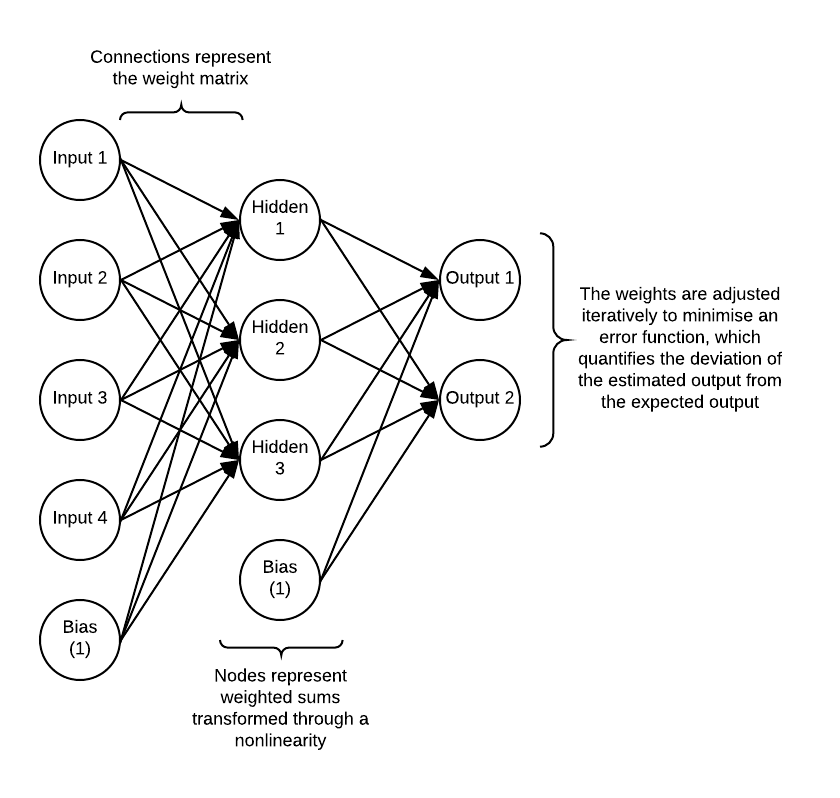

Notice that the bias node always represents the value 1, which is scaled by the weight matrix. This is equivalent to adding a bias vector that is calculated separately, as we did in the previous exercise.

A key skill to develop is to keep track of the matrix shapes (dimensions) when constructing networks. Excluding the bias term, the weight matrix shape follows the following rule for each layer:

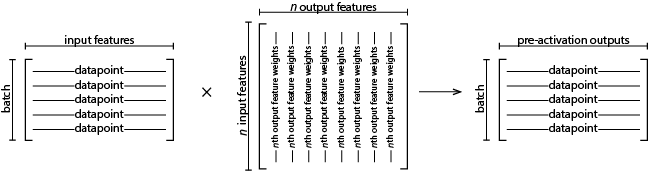

**Remeber:** For a given layer in a network with $i$ input examples, each with $m$ input features and $n$ output activations, the weight matrix $\textbf{W}$ should have a shape of `(m, n)`, the bias vector $\textbf{b}$ should have a shape of `(n,)`, and the resulting activations $\textbf{A}$ will have a shape of `(i, n)`.

**Challenge:**<br/>
TensorFlow provides a convenient abstraction that allows us to create weights and biases in one go. Modify the softmax regression example to use the [tf.layers.dense](https://www.tensorflow.org/api_docs/python/tf/layers/dense) function to take the 784 element image and produce a three-layer network with layers of size 100, 50 and 10. Use the [tf.tanh](https://www.tensorflow.org/api_docs/python/tf/tanh) activation function for the first and second layer, and set to `None` for the last layer (an activation of `None` is just a weighted sum with no transformation). Train this model and compare the accuracy with the softmax regression model.

In [ ]:
tf.reset_default_graph() # Start with a fresh graph and session
sess = tf.InteractiveSession()

In [ ]:
x = tf.placeholder(dtype=tf.float32, shape=(None, 28, 28))
y = tf.placeholder(dtype=tf.float32, shape=(None, 10))

x_norm = x / 255.0
x_flat = tf.reshape(x_norm, (-1, 28 * 28))
layer1 = None # Hint: tf.layers.dense(INPUT, NUMBER OF UNITS, activation=ACTIVATION FUNCTION)
layer2 = None
layer3 = None

y_hat = None # Use tf.nn.softmax

loss = None # Use tf.losses.softmax_cross_entropy

accuracy = tf.reduce_sum(tf.cast(tf.equal(tf.argmax(y_hat, axis=1), tf.argmax(y, axis=1)), tf.int32)) / tf.shape(y)[0]

train_op = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
init_op = tf.global_variables_initializer()

How does this models compare to the softmax regression in terms of the number of trainable parameters?

In [ ]:
print("This model has %i parameters." % count_parameters())

**Expected output:**
```
This model has 84060 parameters.
```

In [ ]:
init_op.run()
losses_train = []
accuracies_train = []
losses_test = []
accuracies_test = []

In [ ]:
batch_size = 100
for epoch in range(20):
    shuffle_idx = np.random.permutation(len(train_img))
    train_img_shuffled, train_labels_shuffled = train_img[shuffle_idx], train_labels[shuffle_idx]
    
    epoch_acc_train = []
    epoch_loss_train = []
    epoch_acc_test = []
    epoch_loss_test = []
    
    for i in range(0, len(train_img), batch_size):
        batch = {x: train_img_shuffled[i:i+batch_size], y: train_labels_shuffled[i:i+batch_size]}
        train_op.run(batch)
        epoch_loss_train.append(loss.eval(batch))
        epoch_acc_train.append(accuracy.eval(batch))
        
    for i in range(0, len(test_img), batch_size):
        batch = {x: test_img[i:i+batch_size], y: test_labels[i:i+batch_size]}
        epoch_loss_test.append(loss.eval(batch))
        epoch_acc_test.append(accuracy.eval(batch))
        
    losses_train.append(np.mean(epoch_loss_train))
    accuracies_train.append(np.mean(epoch_acc_train))
    losses_test.append(np.mean(epoch_loss_test))
    accuracies_test.append(np.mean(epoch_acc_test))
    
plot_loss_accuracy(losses_train, accuracies_train, losses_test, accuracies_test)

print("Final training set accuracy: %0.2f%%" % (accuracies_train[-1] * 100))
print("Final test set accuracy: %0.2f%%" % (accuracies_test[-1] * 100))

**Expected output:** (might vary slightly)<br/>
```
Final training set accuracy: 99.88%
Final test set accuracy: 97.74%
```

In [ ]:
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = [np.argmax(y_hat.eval({x: img.reshape(1,28,28)})) for img in test_img]
plot_misclassifications(true_labels, predicted_labels)

### A note on activation functions
Neural networks are said to be [universal approximators](https://en.wikipedia.org/wiki/Universal_approximation_theorem) that, with an appropriate number of parameters, can map their inputs to an approximation of any continuous function of a specified error threshold for any set of inputs within a finite range. This relies upon the selection of a nonlinear activation function, and there are several popular functions to choose from. Below are five popular nonlinear activation functions:

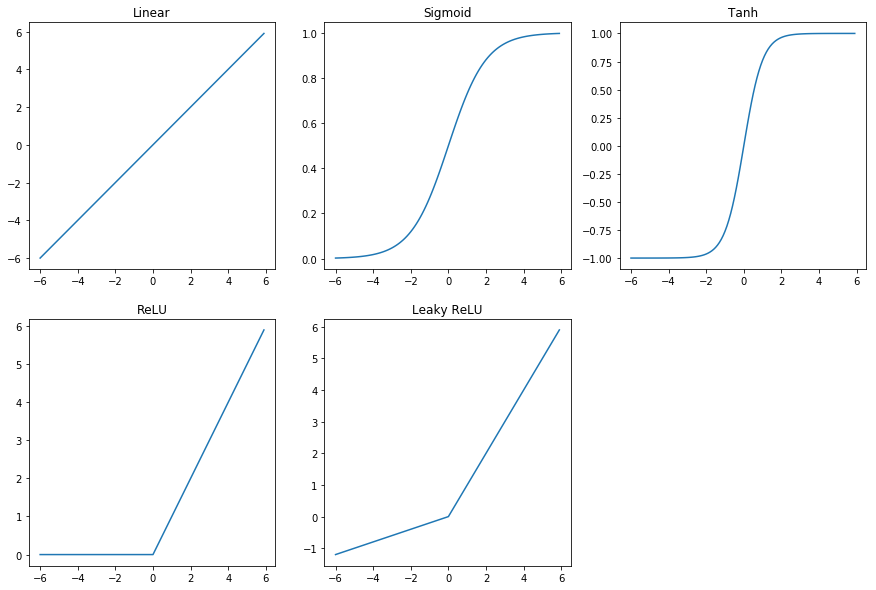

So far we have used the sigmoid and tanh functions exclusively, but there are some important considerations when choosing the most suitable function. Below is a short introduction to five of the more commonly used functions:

#### Linear
This function maps an input value to itself (i.e. $f(x)=x$); this function is often used in the final output of a regression network if the output should take on any real value from $-\infty$ to $+\infty$. A network entirely composed of linear activation functions simply reduces to a linear regression.

#### Sigmoid
This function maps any input value from $-\infty$ to $+\infty$ to a value between 0 and 1. This has historically been the activation function of choice for many networks, but is essential in the final layer if the network should output a probability. In the multiclass approaches, the equivalent softmax function is used. A key issue encountered with the sigmoid function is known as the [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) where very large or very small inputs cause a very shallow gradient, which can take a long time to optimise with gradient descent methods.

#### Hyperbolic tangent (tanh)
Whereas the sigmoid function maps inputs to an output between 0 and 1, the tanh function maps inputs from -1 to 1. Tanh similarly has issues with vanishing gradients at the extremes, but is said to [converge faster than the sigmoid function](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf) with properly normalised inputs.

#### Rectified Linear Unit (ReLU)
The ReLU function maps the input to zero for all inputs less than zero, otherwise it is linear. This makes the derivatives easy to calculate; there is no vanishing gradient since it is constant for all values $> 0$. ReLU units can suffer from becomming "dead", which occurs when the ReLU is stuck with weights producing values $< 0$. Since the derivative is zero in this regime (i.e. changing its input does not change its output), no amount of optimisation steps will alter the weights. ReLU can be used as the final output layer if the network is expected to produce values from 0 to $+\infty$.

#### Leaky Rectified Linear Unit (ReLU)
The Leaky ReLU is a modification of the standard ReLU that retains the linear mapping for all positive outputs, and remaps to a shallower linear relationship (e.g. $f(x) = 0.1x$) for values $< 0$. This function eliminates the "dead neuron" problem by ensuring the gradient can be evaluated for all values of $x$ but doesn't vanish.

## Neural networks for image data

### Convolution
The convolution operation is a process where a matrix of weights (the _convolution kernel_ or _filter_) is scanned across an input matrix. At each step of the scan, the kernel is multiplied element-wise with the corresponding region of the input matrix and summed to produce a single value. The result of the convolution operation is called an "activation map".
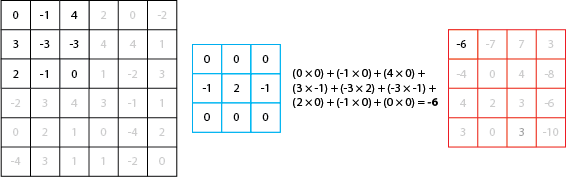

In convolutional neural networks, the convolution layers are defined in terms of the number of filters, size of the filters, stride and padding. Here, stride refers to the gap between each step (the larger the stride, the smaller the activation map). Padding is usually set to "valid" or "same", where the latter forces the activation map size to equal the input size by padding the input with zeros.

The activation map size in each dimension can be calculated as:

$$L_\text{output}=\frac{L_\text{input}-F+2P}{S}+1$$

Where for the given dimension $L_\text{input}$ and $L_\text{output}$ are the size before and after convolution, $F$ is the filter size, $P$ is the padding and $S$ is the stride length. The activation map will have the same number of channels as there are filters.

#### Playing with convolutions
Below is an example of a hand-crafted convolution kernel applied to a few different inputs. **What is this convolution designed to do?**

In [ ]:
kernel = np.array([
    [0, 0, 0],
    [-1, 2, -1],
    [0, 0, 0]
])

v_edge = np.zeros((12, 12))
v_edge[:, 6:] = 1
h_edge = v_edge.T
diag = np.tri(*v_edge.shape).T

# The "do_convolution" function is not part of TensorFlow; we've just provided it for convenience
v_conv = do_convolution(kernel, v_edge)
h_conv = do_convolution(kernel, h_edge)
diag_conv = do_convolution(kernel, diag)

plt.figure(1, figsize=(15,10))
ax = plt.subplot(2,3,1)
ax.set_title("Vertical edge")
sns.heatmap(v_edge, annot=True, cmap="gray", cbar=False, square=True, ax=ax)
ax = plt.subplot(2,3,2)
ax.set_title("Horizontal edge")
sns.heatmap(h_edge, annot=True, cmap="gray", cbar=False, square=True, ax=ax)
ax = plt.subplot(2,3,3)
ax.set_title("Diagonal edge")
sns.heatmap(diag, annot=True, cmap="gray", cbar=False, square=True, ax=ax)
ax = plt.subplot(2,3,4)
ax.set_title("Vertical edge (Conv)")
sns.heatmap(v_conv, annot=True, cmap="gray", cbar=False, square=True, ax=ax)
ax = plt.subplot(2,3,5)
ax.set_title("Horizontal edge (Conv)")
sns.heatmap(h_conv, annot=True, cmap="gray", cbar=False, square=True, ax=ax)
ax = plt.subplot(2,3,6)
ax.set_title("Diagonal edge (Conv)")
sns.heatmap(diag_conv, annot=True, cmap="gray", cbar=False, square=True, ax=ax)

In [ ]:
lion = imread("http://farm1.static.flickr.com/132/417975520_5e8053ca8c.jpg", as_grey=True)
lion_emboss = do_convolution(kernel, lion)
fig = plt.figure(1, figsize=(10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(lion, cmap="gray")
fig.add_subplot(1, 2, 2)
plt.imshow(lion_emboss, cmap="gray", vmin=0)

While this filter was hand-crafted for a certain feature, convolutional neural networks can learn these features as needed. The ensemble of these learnt features is then used perform the desired task, e.g. handwriting recognition. Generally, as the layers get deeper, the number of filters increases while the activation map size reduces.

**Why convolve?**
1. Fewer parameters: rather than associating multiple weights per pixel, multiple filters consisting of only a few parameters are associated with each pixel.
2. Limited possibility of over-fitting: Since the number of weights is reduced, the kernels are forced to respond to common features in a spatially invariant way

See a simple CNN in action on the [Stanford CS231n website](http://cs231n.stanford.edu)!

### Max pooling

Max pooling is a common downsampling technique where only the largest value (most important) within a given region is carried forward. Along with reducing the size of the data, they introduce some degree of translational invariance; a small shift in the $x$ or $y$ direction will not affect the output of the pooling operation.

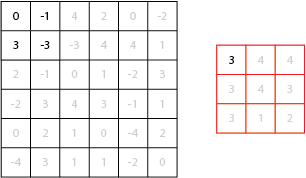

Pooling layers are defined in terms of their stride and size and have no trainable parameters. They preserve the number of channels in the activation map.

Recently, the necessity of pooling layers [has been questioned](https://arxiv.org/pdf/1412.6806.pdf) since the same downsampling effect can be achieved with an increased convolution size. Pooling [has also been criticised](https://www.reddit.com/r/MachineLearning/comments/2lmo0l/ama_geoffrey_hinton/clyj4jv/) since it can lose valuable spatial information. Nevertheless, it remains an extremely common approach in image processing today.

### Dropout
Dropout is a regularisation technique to help reduce overfitting during training. When dropout is activated for a given layer, a random selection of activations are set to zero at each training step, with the remaining activations upscaled to preserve the net activation.

### Batch normalisation
Batch normalisation is used to accelerate training by normalising the activations of layers of the network in a similar way that one would when preparing the input data. The normalisation transformation (i.e. mean centring, unit variance) is learnt during training from each batch (hence the name "batch normalisation"). For more information, read the [original paper here](https://arxiv.org/pdf/1502.03167.pdf).

## The LeNet architecture
The LeNet architecture was one of the first applications of convolutional neural networks back in 1998 and was applied to handwriting recognition using the MNIST dataset. Take a look at the [original paper](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf); you can see that it consists of successive 5x5 convolution and pooling operations, followed by some fully connected layers just like in the softmax regression exercise.

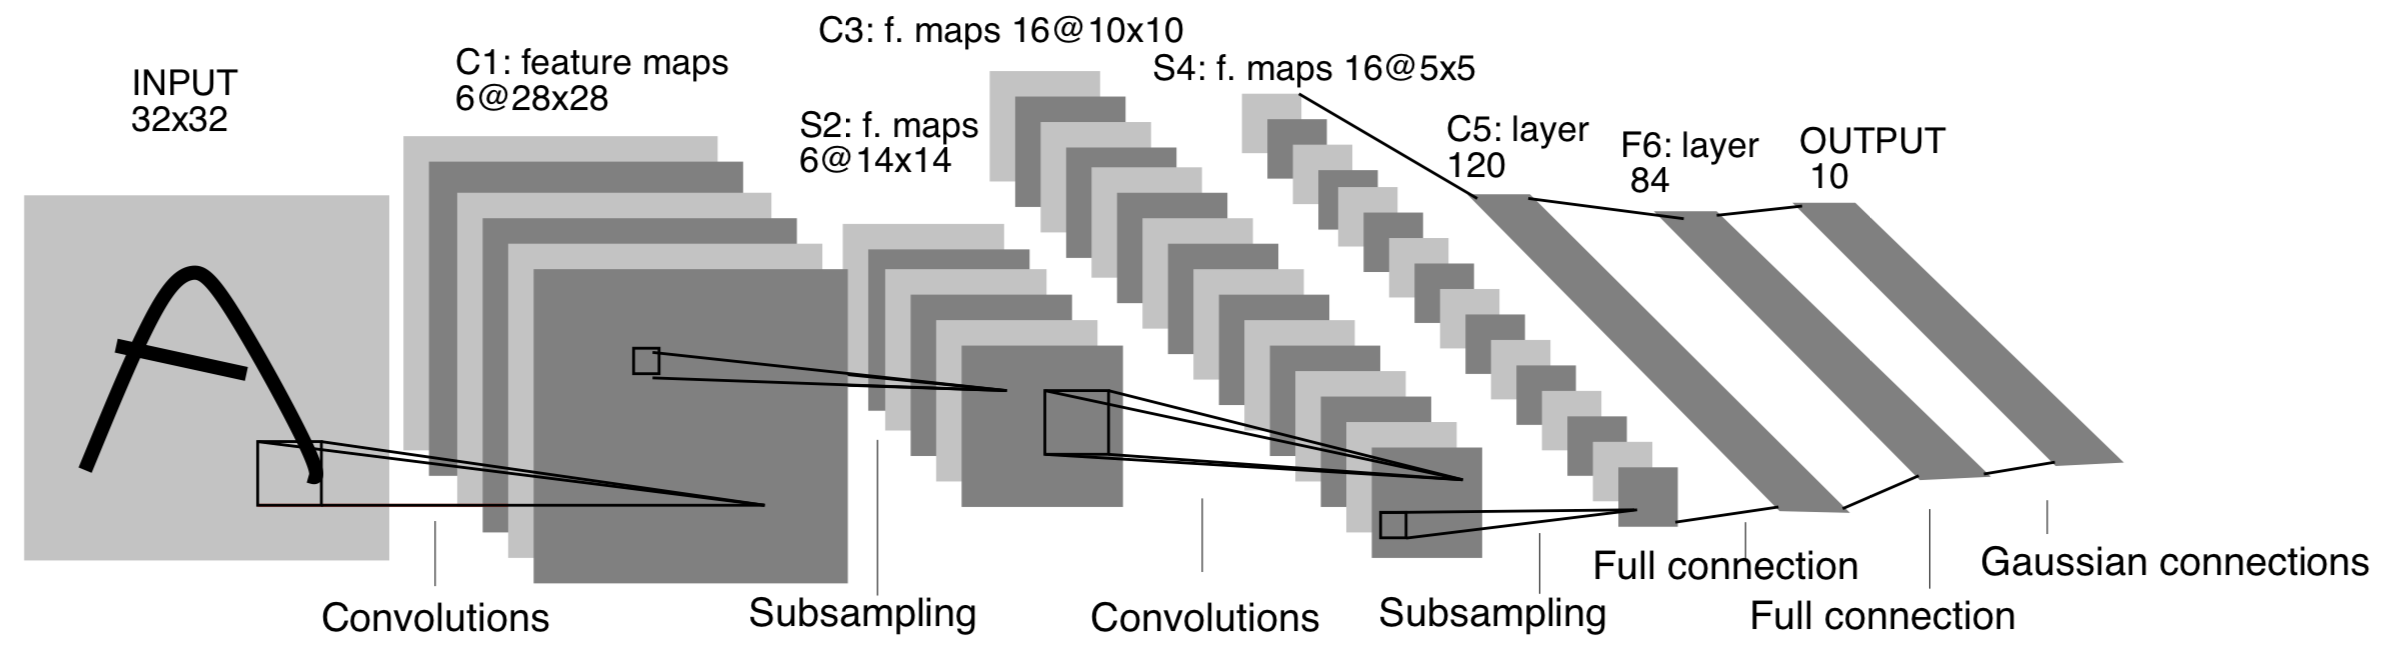

**We will implement a slightly modified version of LeNet.**

The main differences compared to the original paper include utilising ReLU activations for all layers instead of Gaussian activations, and rather than selectively connecting activation maps between S3 and C3, we'll introduce dropout layers in the hope of achieving the an equivalent effect.

### Data preparation
The LeNet architecture specifies an input size of 32x32, but the MNIST is only 28x28 (**why?**). So we need to pad our dataset with zeros. The data also needs to be centred about zero and rescaled to unit variance.

The following cells perform the padding, and also reshape the data to include a channel dimension, resulting in an image shape of 32x32x1. If this were colour data, the shape would be 32x32x3 where the last axis represents the red, green and blue colour values.

In [ ]:
def pad_and_rescale(data):
    train_padded = np.pad(train_img, ((0, 0), (2, 2), (2, 2)), mode='constant')
    padded_data = np.pad(data, ((0, 0), (2, 2), (2, 2)), mode='constant')
    return (padded_data - train_padded.mean()) / train_padded.std()

In [ ]:
train_img, train_labels, test_img, test_labels = load_mnist()

# These lines add the extra channel dimension
train_img_scaled = np.expand_dims(pad_and_rescale(train_img), axis=-1)
test_img_scaled = np.expand_dims(pad_and_rescale(test_img), axis=-1)

In [ ]:
tf.reset_default_graph() # Start with a fresh graph and session
sess = tf.InteractiveSession()

**Challenge:**<br/>
Implement the LeNet architecture as:
1. Placeholder tensors `x` and `y` for the input data of type `tf.float32`. **Remember that the input `x` shape has changed to `(None, 32, 32, 1)`**
2. A placeholder tensor `train` of type `tf.bool` and `shape=[]` (this is used later to switch dropout on and off)
1. `conv_1` is 6 filters with a 5x5 kernel size and stride of 1, ReLU activation (use [`tf.layers.conv2d`](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d) and [`tf.nn.relu`](https://www.tensorflow.org/api_docs/python/tf/nn/relu))
2. `pool_1` is max pooling layer with a 2x2 window with a stride of 2 (use [`tf.layers.max_pooling2d`](https://www.tensorflow.org/api_docs/python/tf/layers/max_pooling2d))
3. `conv_2` is 16 filters with a 5x5 kernel size and stride of 1, ReLU activation
4. `pool_2` is max pooling layer with a 2x2 window with a stride of 2
5. `conv_3` is 125 filters with a 1x1 kernel size and stride of 1, ReLU activation
6. `flat` is the flattened output of conv_3 (use [`tf.layers.flatten`](https://www.tensorflow.org/api_docs/python/tf/layers/flatten))
7. `dropout_1` is a dropout layer with a dropout rate of 0.5 and should be connected to `flat` (use [`tf.layers.dropout`](https://www.tensorflow.org/api_docs/python/tf/layers/dropout) and be sure to set the `training` argument)
8. `fc_1` is a fully-connected layer connected to `dropout_1` with 84 units and ReLU activation (use [`tf.layers.dense`](https://www.tensorflow.org/api_docs/python/tf/layers/dense))
9. `dropout_2` is a dropout layer with a dropout rate of 0.5 and should be connected to `fc_1`
10. `fc_2` is a fully-connected layer connected to `dropout_2` with 10 units and linear activation (set `activation` to `None`)

In [ ]:
x = None # [Step 1]
y = None # [Step 1]
train = None # [Step 2]

# Conv (5*5*1*6 + 6 parameters, output volume = 28x28x6)
conv_1 = None # [Step 3] Hint: tf.layers.conv2d(INPUT, NUMNER OF FILTERS, SIZE OF FILTER, activation=ACTIVATION FUNCTION)

# Pool (0 parameters, output volume = 14x14x6)
pool_1 = None # [Step 4] Hint: tf.layers.max_pooling2d(INPUT, WINDOW SIZE, strides=STRIDE LENGTH)

# Conv (5*5*6*16 + 16 parameters, output_volume = 10x10x16)
conv_2 = None # [Step 5]

# Pool (0 parameters, output_volume = 5x5x16)
pool_2 = None # [Step 6]

# Conv (1*1*16*120 + 120 parameters, output_volume = 5x5x120)
conv_3 = None # [Step 7]

# Flatten (0 parameters, output_volume = 3000)
flat = None # [Step 8]

# Dropout (0 parameters, output_volume = 3000)
dropout_1 = None # [Step 9] Hint: tf.layers.dropout(INPUT, rate=DROPOUT RATE, training=TRAINING MODE?)

# FC (3000*84 + 84, output_volume = 84)
fc_1 = None # [Step 10]

# Dropout (0 parameters, output_volume = 84)
dropout_2 = None # [Step 11]

# FC (84*10 + 10 parameters, output_volume = 10)
fc_2 = None # [Step 12]

y_hat = tf.nn.softmax(fc_2)

loss = tf.losses.softmax_cross_entropy(y, fc_2)

accuracy = tf.reduce_sum(tf.cast(tf.equal(tf.argmax(y_hat, axis=1), tf.argmax(y, axis=1)), tf.int32)) / tf.shape(y)[0]

train_op = tf.train.AdamOptimizer(learning_rate=0.005).minimize(loss)
init_op = tf.global_variables_initializer()

In [ ]:
print("This model has %i parameters." % count_parameters())

In [ ]:
init_op.run()
losses_train = []
accuracies_train = []
losses_test = []
accuracies_test = []

**Slow code warning:** This training can take a few minutes to complete! 

In [ ]:
batch_size = 100
for epoch in range(6):
    print("Epoch", epoch, ": ", end='')
    shuffle_idx = np.random.permutation(len(train_img_scaled))
    train_img_scaled_shuffled, train_labels_shuffled = train_img_scaled[shuffle_idx], train_labels[shuffle_idx]
    
    epoch_acc_train = []
    epoch_loss_train = []
    epoch_acc_test = []
    epoch_loss_test = []
    
    for i in range(0, len(train_img_scaled), batch_size):
        batch = {x: train_img_scaled_shuffled[i:i+batch_size], y: train_labels_shuffled[i:i+batch_size], train: True}
        train_op.run(batch)
        epoch_loss_train.append(loss.eval(batch))
        epoch_acc_train.append(accuracy.eval(batch))
        
    for i in range(0, len(test_img_scaled), batch_size):
        batch = {x: test_img_scaled[i:i+batch_size], y: test_labels[i:i+batch_size], train: False}
        epoch_loss_test.append(loss.eval(batch))
        epoch_acc_test.append(accuracy.eval(batch))
    
    print("loss (train) = %0.4f, acc (train) = %0.2f%%, loss (test) = %0.4f, acc (test) = %0.2f%%" % (
        np.mean(epoch_loss_train), np.mean(epoch_acc_train) * 100,
        np.mean(epoch_loss_test), np.mean(epoch_acc_test) * 100))
    losses_train.append(np.mean(epoch_loss_train))
    accuracies_train.append(np.mean(epoch_acc_train))
    losses_test.append(np.mean(epoch_loss_test))
    accuracies_test.append(np.mean(epoch_acc_test))
    
plot_loss_accuracy(losses_train, accuracies_train, losses_test, accuracies_test)

print("Final training set accuracy: %0.2f%%" % (accuracies_train[-1] * 100))
print("Final test set accuracy: %0.2f%%" % (accuracies_test[-1] * 100))

**Expected output:** (might vary slightly)<br/>
```
Epoch 0 : loss (train) = 0.2776, acc (train) = 91.11%, loss (test) = 0.0629, acc (test) = 98.01%
Epoch 1 : loss (train) = 0.1505, acc (train) = 95.54%, loss (test) = 0.0468, acc (test) = 98.58%
Epoch 2 : loss (train) = 0.1346, acc (train) = 95.89%, loss (test) = 0.0491, acc (test) = 98.51%
Epoch 3 : loss (train) = 0.1242, acc (train) = 96.19%, loss (test) = 0.0584, acc (test) = 98.31%
Epoch 4 : loss (train) = 0.1238, acc (train) = 96.38%, loss (test) = 0.0442, acc (test) = 98.71%
Epoch 5 : loss (train) = 0.1160, acc (train) = 96.67%, loss (test) = 0.0487, acc (test) = 98.44%
Final training set accuracy: 96.67%
Final test set accuracy: 98.44%
```
### Inspect the output

In [ ]:
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = [np.argmax(y_hat.eval({x: img.reshape(1,32,32,1), train: False})) for img in test_img_scaled]
plot_misclassifications(true_labels, predicted_labels)

Let's take a look at the learnt filters. Re-run these cells altering `img_idx` to see how different examples are viewed by this network:

In [ ]:
img_idx = 50
test_img = test_img_scaled[img_idx].reshape(1,32,32,1)
layer1 = tf.get_default_graph().get_operation_by_name("conv2d/Relu").outputs[0].eval({x: test_img})
layer2 = tf.get_default_graph().get_operation_by_name("conv2d_1/Relu").outputs[0].eval({x: test_img})
layer3 = tf.get_default_graph().get_operation_by_name("conv2d_2/Relu").outputs[0].eval({x: test_img})

These are the first six convolution kernels:

In [ ]:
layer1_kernel = tf.get_default_graph().get_operation_by_name("conv2d/kernel").outputs[0].eval()
plt.figure(1, figsize=(25,10))
for i in range(layer1_kernel.shape[-1]):
    feature_map = layer1_kernel[:,:,0,i]
    ax = plt.subplot(2,3,i+1)
    sns.heatmap(feature_map.squeeze(), annot=True, cmap="gray", cbar=False, square=True, vmin=layer1_kernel.min(),
                vmax=layer1_kernel.max(), ax=ax)

And these are the activation maps they produce after being passed through the ReLU activation function:

In [ ]:
plt.figure(1, figsize=(25,10))
ax = plt.subplot(3,3,2)
plt.imshow(test_img.squeeze())
for i in range(layer1.shape[-1]):
    feature_map = layer1[:,:,:,i]
    ax = plt.subplot(3,3,i+4)
    plt.imshow(feature_map.squeeze(), cmap="gray", vmin=layer1.min(), vmax=layer1.max())

In [ ]:
plt.figure(1, figsize=(25,10))
for i in range(layer2.shape[-1]):
    feature_map = layer2[:,:,:,i]
    ax = plt.subplot(4,4,i+1)
    plt.imshow(feature_map.squeeze(), cmap="gray", vmin=layer2.min(), vmax=layer2.max())

In [ ]:
plt.figure(1, figsize=(25,10))
for i in range(layer3.shape[-1]):
    feature_map = layer3[:,:,:,i]
    ax = plt.subplot(12,10,i+1)
    plt.imshow(feature_map.squeeze(), cmap="gray", vmin=layer3.min(), vmax=layer3.max())

### Introducing higher-level TensorFlow APIs
#### The Dataset API
So far we have been hand-crafting out data into numpy arrays and batches, and feeding them into our model using the `feed_dict` parameter of the `sess.run()` call or on our tensors directly using `eval()` or `run()`. This has widely been recognised as cumbersome, and in response, TensorFlow has released a high-level [Dataset API](https://www.tensorflow.org/get_started/datasets_quickstart).

The primary goal of the Dataset API is to enable developers to specify a data loading and transformation pipeline that automatically handles batching and shuffling and is compatible with a wide variety of data sources. While beyond the scope of this class, the API also handles more advanced concepts such as "[sharding](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shard)", where subsets of data are loaded on distributed hardware for truly large-scale calculations.

One of the main objects that you will interact with in the Dataset API is called an [_iterator_](https://www.tensorflow.org/api_docs/python/tf/data/Iterator). The job of an iterator is to provide one or more data elements (e.g. training bacthes) as required, while keeping track of how far through the dataset we have traversed. In practise, you will periodically evaluate the "get next" tensors relating to the dataset, which will return different values each time. Let's look at a real example using the wine dataset:

In [ ]:
# First, load the data into some numpy arrays. 25% of the data is held out for testing
x_data_train, y_data_train, x_data_test, y_data_test = load_wine_data(test_frac=0.25)
print("This is the first three couple of rows of X:\n", x_data_train[:3])
print("This is the first three couple of rows of Y:\n", y_data_train[:3])

In [ ]:
# Clear our current graph
tf.reset_default_graph()
sess = tf.InteractiveSession()

# Create the dataset - this one is using our numpy arrays as a data source
# `from_tensor_slices` treats each item in the first axis as a training example
example_dataset = tf.data.Dataset.from_tensor_slices({"x": x_data_train, "y": y_data_train})

# Instantiate the iterator - its job is to keep track of where we are in the dataset
example_dataset_iterator = example_dataset.make_one_shot_iterator()

# Create our "get next" tensors
example_dataset_input_tensors = example_dataset_iterator.get_next()

print(example_dataset_input_tensors)

Notice that the output of `get_next()` is a dictionary containing the same keys (`x` and `y`) that we provided when we created the dataset from the numpy arrays. Take a look at what happens when we evaluate these tensors:

In [ ]:
sess.run(example_dataset_input_tensors)

Rerun the above cell a few times!

Now, here's where the Dataset API gets powerful. Previously we had a lot of extra code to shuffle and batch our data. We can achieve the same result in just two additional lines:

In [ ]:
example_dataset_shuffled = example_dataset.shuffle(buffer_size=1000)
example_dataset_batched = example_dataset_shuffled.batch(3)

# This is the same stuff as in the above example:
# Create the iterator
example_dataset_iterator = example_dataset_batched.make_one_shot_iterator()
# Create our "get next" tensors
example_dataset_input_tensors = example_dataset_iterator.get_next()

A subtlety regarding the shuffle operation: Since datasets can be arbitratily large, it's not a given that we can shuffle all elements at once. The shuffle `buffer_size` acts as a known-size pool of elements where shuffling takes place. For each element that taken out of the shuffled buffer, a new one from the remainder of the dataset is moved in and becomes "shufflable."

Run the cell below a few times to see what the new iterator is doing:

In [ ]:
sess.run(example_dataset_input_tensors)

Each time the new iterator is run, we get a shuffled batch of three elements per batch!

#### The Estimator API

Whereas TensorFlow generally can be considered just a numerical computation framework, the [Estimator API](https://www.tensorflow.org/programmers_guide/estimators) aims to specifically cater for the machine learning lifecycle of train, evaluate, predict and export.

To create an Estimator, the minimum requirement is a model function:
```
def model_fn(features, labels, mode):
    
    # define the model here, just as we always have
    # * `features` is just like our `x` placeholder
    # * `labels` is just like our `y` placeholder
    # * `predictions` is just like out `y_hat` tensor
    # * `mode` allows us to tweak our model depending on whether we're training, evaluating or predicting
    
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=predictions,
        loss=loss,
        train_op=train_op)
```

To actually _use_ the estimator, we need an input function. All the input function needs to do is return a dataset tuple of `(features, labels)`. Easy!

Here is a full example of the wine dataset exercise using the Estimator and Dataset API:

In [ ]:
def model_fn(features, labels, mode):
    weights = tf.get_variable("weights", dtype=tf.float32, initializer=tf.zeros((11, 1)))
    bias = tf.get_variable("bias", dtype=tf.float32, initializer=tf.zeros((1,)))
    logits = tf.matmul(features, weights) + bias
    y_hat = tf.sigmoid(logits)
    loss = tf.losses.sigmoid_cross_entropy(labels, logits)
    metrics = {
        "accuracy": tf.metrics.accuracy(labels > 0.5, y_hat > 0.5)
    }
    
    # This global_step parameter accepts a tensor that is incremented with each optimisation step
    # It helps keep track of how many training steps have been completed
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(
        loss, global_step=tf.train.get_or_create_global_step())
    
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=y_hat,
        loss=loss,
        train_op=train_op,
        eval_metric_ops=metrics)

def train_input_fn():
    # Note that we're using `from_tensors` and not `from_tensor_slices`
    # In this case, `from_tensors` treats the entire input as one big batch training example.
    wine_dataset = tf.data.Dataset.from_tensors((x_data_train, y_data_train))
    wine_dataset = wine_dataset.repeat(200)
    return wine_dataset.make_one_shot_iterator().get_next()

def test_input_fn():
    wine_dataset = tf.data.Dataset.from_tensors((x_data_test, y_data_test))
    return wine_dataset.make_one_shot_iterator().get_next()

wine_model = tf.estimator.Estimator(model_fn)

print()
print("TRAINING...")
wine_model.train(train_input_fn)
print()
print("EVALUATING...")
wine_model.evaluate(test_input_fn)

**Expected output:**
(final line)
```
{'accuracy': 0.93349755, 'global_step': 200, 'loss': 0.2397592}
```

**Advanced challenge:**<br/>
Adapt the LeNet code to use the Dataset and Estimator APIs.



In [ ]:
def model_fn(features, labels, mode):
    x = features
    y = labels
    
    train = None # Check that `mode` equals tf.estimator.ModeKeys.TRAIN

    ### Create your LeNet model here ###
    # Be sure to include all layers, the loss function, and y_hat
    
    train_op = tf.train.AdamOptimizer(learning_rate=0.005).minimize(
        loss, global_step=tf.train.get_or_create_global_step())
    
    metrics = {
        "accuracy": tf.metrics.accuracy(tf.argmax(y, axis=1), tf.argmax(y_hat, axis=1))
    }
    
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=y_hat,
        loss=loss,
        train_op=train_op,
        eval_metric_ops=metrics)

def train_input_fn():
    nist_dataset = tf.data.Dataset.from_tensor_slices((train_img_scaled, train_labels))
    nist_dataset = None # Repeat for 6 epochs. Hint: nist_dataset.repeat(NUMBER OF EPOCHS)
    nist_dataset = None # Shuffle each epoch. Hint: nist_dataset.shuffle(BUFFER SIZE)
    nist_dataset = None # Batch the data. Hint: nist_dataset.batch(BATCH SIZE)
    return nist_dataset.make_one_shot_iterator().get_next()

def test_input_fn():
    nist_dataset = tf.data.Dataset.from_tensor_slices((test_img_scaled, test_labels))
    nist_dataset = None # Batch the data
    return nist_dataset.make_one_shot_iterator().get_next()


lenet_model = None # Create the estimator using tf.estimator.Estimator()

print()
print("TRAINING...")
# Train the model using lenet_model and the train_input_fn
print()
print("EVALUATING...")
# Evaluate the model using lenet_model and test_input_fn

**Expected output:**
(final line, might vary slightly)
```
{'accuracy': 0.9864, 'global_step': 3600, 'loss': 0.046120092}
```

## \[Bonus material\] Neural networks for sequence data: Ratings from IMDB reviews

Now that you have a good idea of how layers fit together and how some of the higher-level TensorFlow APIs work, we're ready to take on some more complex concepts. We'll start out with some basics of numerically representing text and then pull it all together with a neat model that tries to guess a movie 10-star rating based on the text of a review.

### Text preprocessing: Tokenisation, stemming and lemmatisation
A common text preprocessing step involves tokenisation, followed by some form of stemming/lemmatisation process.

Tokenisation is the process by which text is segmented into semantic units. These are usually words, groups of words (e.g. "New South Wales" rather than "New", "South", "Wales") or sentences.

In [ ]:
example_sentence = "I spoke with my friend in the U. S. A. today on the phone. Afterwards, I went to the park in Hoppers Crossing and saw three geese."
sentence_tokens = nltk.tokenize.sent_tokenize(example_sentence)
print("Example sentence:\n%s\n" % example_sentence)
print("Sentence tokens:\n", '\n '.join(sentence_tokens), '\n')

[_Stemming_](https://en.wikipedia.org/wiki/Stemming) and [_lemmatisation_](https://en.wikipedia.org/wiki/Lemmatisation) are methods to reduce word tokens to a standardised representation, e.g. "went", "gone" and "going" all relate to the infinitive "to go", thus these three words might all be reduced to just "go". The puspose of this is to produce a simplified vocabulary without sacrificing much of the meaning. The difference between stemming and lemmatisation is essentially that the former uses simple heuristics whereas the latter attempts to consider the function of the word in the sentence. Consider the examples below generated using the [NLTK package](http://www.nltk.org):

In [ ]:
tokens = nltk.tokenize.word_tokenize(sentence_tokens[1])
print("Tokens:", ' | '.join(tokens), "\n")

stemmer = nltk.stem.SnowballStemmer('english')
print("Stemmed tokens:", ' | '.join([stemmer.stem(t) for t in tokens]), "\n")

tagged = nltk.pos_tag(tokens)
print("POS tagged tokens:", ' | '.join(["%s (%s)" % (t, p) for t, p in tagged]), "\n")

lemmatiser = nltk.stem.WordNetLemmatizer()
lemmatised = []
for t, p in tagged:
    if p.startswith('J'):
        tag = nltk.corpus.wordnet.ADJ
    elif p.startswith('V'):
        tag = nltk.corpus.wordnet.VERB
    elif p.startswith('N'):
        tag = nltk.corpus.wordnet.NOUN
    elif p.startswith('R'):
        tag = nltk.corpus.wordnet.ADV
    else:
        lemmatised.append(t)
        continue
    lemmatised.append(lemmatiser.lemmatize(t, tag))
print("Lemmatised tokens:", ' | '.join(lemmatised))

We have provided a tokeniser that is a hybrid of the above, along with some additional text cleaning steps:
1. Any HTML tags picked up from IMDB are stripped
2. Sentences are tokenised into sentence tokens
3. Each sentence token is tokenised into word tokend
4. The word tokens are POS tagged
5. Each tagged word token is lemmatised
6. For each word that cannot be lemmatised, stemming is used
7. Any token that contains a digit or does not contain any a-z character is dropped
8. All remaining tokens are converted to lower case

Try it out!

In [ ]:
example_sentence = "I am really looking forward to using this model!"
print("Tokens:",' | '.join(tokenise(example_sentence)))

#### Representing text with one-hot encoding 

The one-hot method of representing text is quite simple: for each input sentence, a vector for each word in the text with a length of all possible words (the vocabulary) is created. Each vector contains zeros everywhere except at the index of the given word in the vocabulary where a one is inserted.

For example, if a vocabualry of:
\['.', 'I', 'cooking', 'enjoy', 'hate', 'movies', 'watching'\]

The sentence: "I enjoy watching movies." would be represented as:

\[0, 1, 0, 0, 0, 0, 0\]<br/>
\[0, 0, 0, 1, 0, 0, 0\]<br/>
\[0, 0, 0, 0, 0, 0, 1\]<br/>
\[0, 0, 0, 0, 0, 1, 0\]<br/>
\[1, 0, 0, 0, 0, 0, 0\]

Using the IMDB dataset, a vocabulary of 9272 words was compiled after tokenising and accepting only words that occurred more than 50 times in the dataset. For the purpose of one-hot encoding, we reserved one position for an "Unknown Word" token. You can see some of the words in the vocabulary below:

In [ ]:
# This dictionary maps the token to the word index:
imdb_vocabulary = next(load_imdb_data('vocab'))
imdb_vocabulary

Using this vocabulary, we can encode sentences as follows (notice that Ezequiel does not appear in the vocabulary, so it gets the unknown word token):

In [ ]:
encode_text("Hello, world! My name is Ezequiel.")

This index representation of the sentence can then be easily converted into one-hot encoding as described above.

### Understanding recurrent neural networks
Recurrent neural networks (RNNs) are designed specifically to handle sequences of data, including data of variable lengths. RNNs are usually depicted using diagrams such as these:

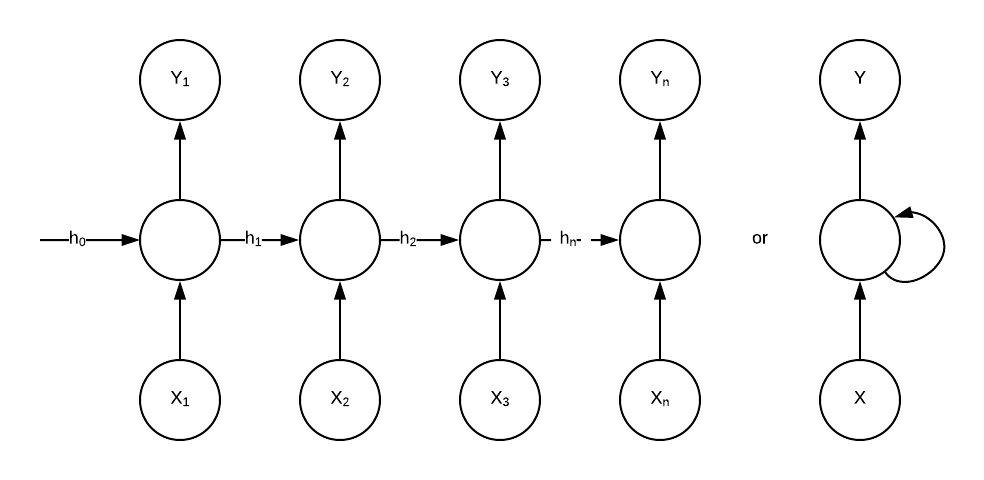

This kind of network is unique in that it can process arbitrary amounts of input data simply by updating the internal state based on previously seen data (shown by the horizontal arrows). In a basic RNN, the following equations govern the output and hidden state of each step of the network:

$$h^{(t)} = \phi_h(\textbf{W}_{hh}h^{(t-1)} + \textbf{W}_{hx}x^{(t)} + \textbf{b}_h)$$
$$o^{(t)} = \phi_o(\textbf{W}_{oh}h^{(t)} + \textbf{b}_o)$$

Here, $\phi_x$ and $\phi_o$ refer to the activation function of choice for the input, $x$ and output $o$ at step $t$, which is usually the tanh function. The output $o$ can subsequently be transformed into predictions using a softmax layer, for example. The $\textbf{W}$ and $\textbf{b}$ parameters are weight matrices and biases that correspond to the RNN unit's inputs.

RNNs can take several forms:
##### Many-to-many
This style of RNN produces an output for each input step and follows the architecture in the above diagram. It is useful for problems such as [named entity recognition](https://en.wikipedia.org/wiki/Named-entity_recognition) or wake-word detection most famously used in devices like the iPhone ("Hey Siri"), Google products ("Okay Google"), and Amazon Alexa ("Alexa").

##### Many-to-one
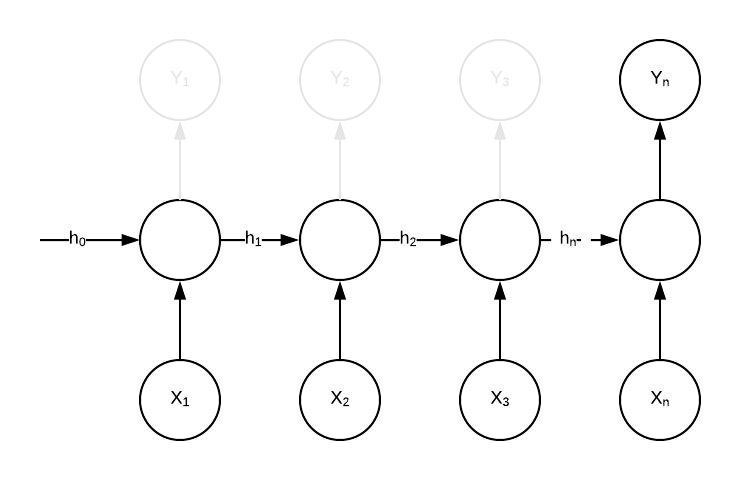

Here only the last output is used for prediction. We will be using this style of RNN for the IMDB movie ratings prediction task; we only want the output once the entire text is parsed. These networks can also be used as a the first half of an encoder/decoder sequence-to-sequence model as used in machine translation tasks.

##### One-to-many
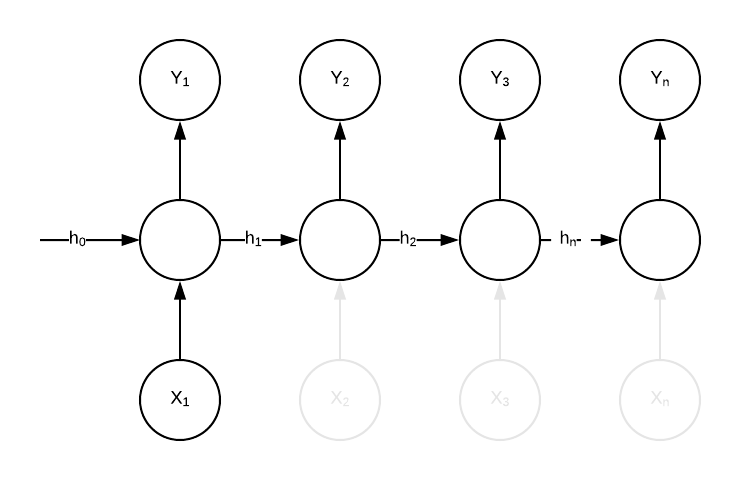

One-to-many networks generate sequences based on a single input. These architectures are used for tasks such as music generation where the first input could be random, or could indicate the style of music desired. They're also often seen as the decoder component of the encode/decode sequence-to-sequence model.

##### Sequence-to-sequence
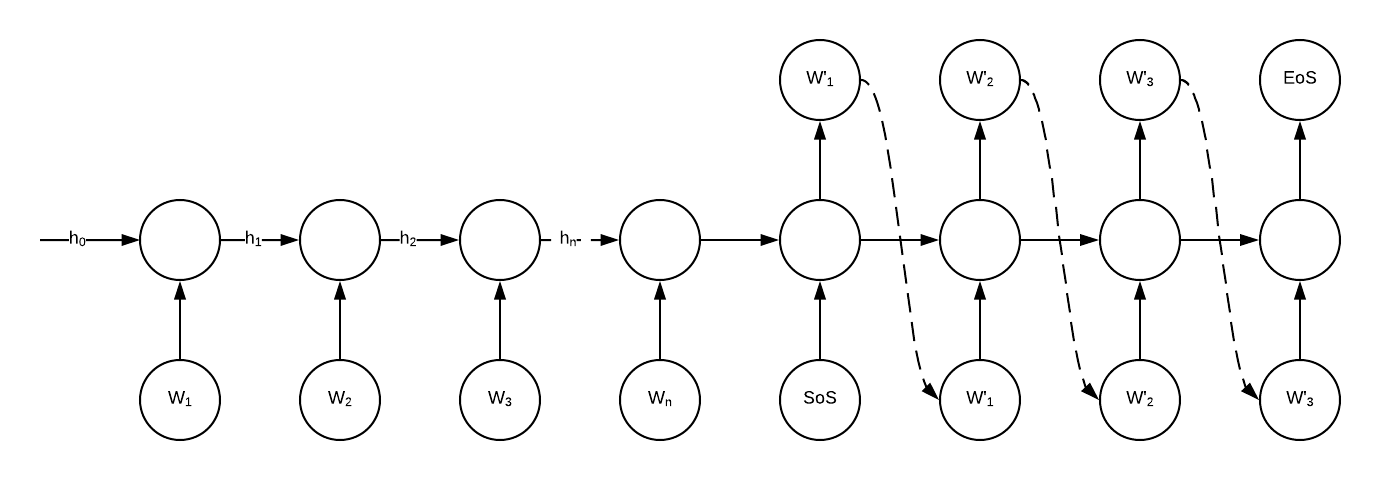

Sequence-to-sequence models typically follow and encoder/decoder architecture as shown above, where a sequence is encoded into a final hidden state, which is passed on as the initial state of a decoder network. The decoder network is effectivley a one-to-many RNN that continues to produce outputs until a final End of Sequence token is detected. There are many variants to this type of network, most notably the use of ["attention"](https://arxiv.org/abs/1409.0473).

#### LSTM and GRU cells
The plain vanilla RNN fomulation described above is not very well suited for complex or long sequences, and in practice is seldom used. [Long short-term memory](https://en.wikipedia.org/wiki/Long_short-term_memory) cells (LSTM) and [gated recurrent unit](https://en.wikipedia.org/wiki/Gated_recurrent_unit) (GRU) cells are most often used.

The specifics of how these cells operate is beyond the scope of this document, except to say that both of these cells are able to learn how to selectively retain information in their hidden state over longer periods through the use of "gate functions". A very good explanation of how LSTM and GRU cells work [can be found here](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). 

### Getting started
This model will read the first 100 words (or less, should there be fewer words in the review) and try to predict what the rating was. It will be a many-to-one RNN using LSTM cells and accept one-hot encoded text, with the final RNN output used for rating prediction.

#### Building the input function

We've preprocessed the IMDB dataset for you, tokenising and converting to vocabulary indices. This dataset has been stored in a special [TFRecord file](https://www.tensorflow.org/programmers_guide/datasets#consuming_tfrecord_data) that can easily be used to create a dataset iterator. On this system, the TFRecord files are located here:

In [ ]:
imdb_train, imdb_test = get_data_location("imdb_train.tfrecords"), get_data_location("imdb_test.tfrecords")
print(imdb_train)
print(imdb_test)

Here are the associated input functions for use with the Estimator API. This model will consider only the first 100 words of each review and pad the encoded sentence with zeros if the number of tokens is less than 100.

In [ ]:
def pad_or_truncate(tensor, max_length):
    """Accepts the encoded text tensor and outputs a truncated or padded version
    depending on the value of `max_length`
    """
    truncated_tensor = tensor[:max_length]
    pad_size = max_length - tf.shape(truncated_tensor)[0]
    length = tf.shape(truncated_tensor)[0]
    return {
        'text': tf.pad(truncated_tensor, [(0, pad_size)]),
        'length': length
    }

def imdb_input_fn(test=False, batch_size=1, max_length=100, first_n_records=None):
    """Returns an input function that iterates over the IMDB dataset"""
    def _input_fn():
        dataset = tf.data.TFRecordDataset(imdb_test if test else imdb_train)
        dataset = dataset.shuffle(100000)
        if first_n_records is not None:
            dataset = dataset.take(first_n_records)
        dataset = dataset.map(lambda example: tf.parse_single_example(example, features={
            "text": tf.VarLenFeature(tf.int64),
            "rating": tf.VarLenFeature(tf.int64)
        }))
        dataset = dataset.map(lambda example: (
            pad_or_truncate(example['text'].values, max_length),
            example['rating'].values
        ))
        dataset = dataset.batch(batch_size)
        return dataset.make_one_shot_iterator().get_next()
    return _input_fn

def imdb_test_input_fn(text, max_length=100):
    """A simple input function for single examples"""
    def _input_fn():
        input_tensor = tf.constant(encode_text(text))
        dataset = pad_or_truncate(input_tensor, max_length)
        dataset = tf.data.Dataset.from_tensors(dataset)
        dataset = dataset.batch(1)
        return dataset
    return _input_fn

#### Building the model function

In [ ]:
def imdb_rnn_model_fn(features, labels, mode):
    text = features['text']
    lengths = features['length']
    
    # This will encode our text as a one-hot vector of length 9272
    text_one_hot = tf.one_hot(text, 9272)
    
    # Here we create the LSTM-based RNN that will produce outputs of 128 elements
    rnn_cell = tf.nn.rnn_cell.LSTMCell(128, state_is_tuple=True)
    
    # The dynamic_rnn function runs the LSTM network for the appropriate number of steps,
    # which is equal to the length of the IMDB movie review text
    outputs, (c, h) = tf.nn.dynamic_rnn(rnn_cell,
                                       text_one_hot,
                                       sequence_length=lengths,
                                       dtype=tf.float32)
    
    # The output, `h`, is the last valid RNN output. We put this through a dense layer of 11 units
    # where each unit corresponds to one possible movie rating (0 to 10)
    logits = tf.layers.dense(h, 11, activation=None)
    
    # If we're not doing a prediction, we'll set up the optimiser and loss function
    loss, train_op = None, None
    if mode != tf.estimator.ModeKeys.PREDICT:
        loss = tf.losses.softmax_cross_entropy(labels, logits)
        train_op = tf.train.AdamOptimizer(learning_rate=0.005).minimize(
            loss, global_step=tf.train.get_or_create_global_step())
    
    # Set up the probabilities and class prediction tensors
    probabilities = tf.nn.softmax(logits)
    predicted_classes = tf.argmax(probabilities, axis=1)
    
    # If we're evaluating the model, set up out evaluation metrics
    metrics = None
    if mode == tf.estimator.ModeKeys.EVAL:
        rating = tf.argmax(labels, axis=1)
        accuracy = tf.metrics.accuracy(labels=rating,
                                       predictions=predicted_classes,
                                       name='acc_op')
        accuracy_pos_neg = tf.metrics.accuracy(labels=rating > 5,
                                       predictions=predicted_classes > 5,
                                       name='acc_op_pn')
        metrics = {
            'accuracy': accuracy,
            'accuracy_pos_neg': accuracy_pos_neg
        }
    
    # If we're performing a prediction, make sure these are organised nicely in a dictionary
    predictions = None
    if mode == tf.estimator.ModeKeys.PREDICT:
        predictions = {
            'probabilities': probabilities,
            'predictions': predicted_classes
        }
    
    # Return our model, ready to go!
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=predictions,
        loss=loss,
        train_op=train_op,
        eval_metric_ops=metrics)

#### Creating the estimator object
Because this model can take some time to train on CPU-only systems, we've provided a pretrained example. The estimator will preload these parameters based on the path provided by `get_imdb_pretrained()`.

In [ ]:
imdb_model = tf.estimator.Estimator(imdb_rnn_model_fn, model_dir=get_imdb_pretrained())
print()
# Evaluate the model using IMDB test data. Use only the first 300 records for testing to speed things up
# (but normally the entire validation set should be used!)
print("EVALUATING...")
imdb_model.evaluate(imdb_input_fn(test=True, batch_size=100, first_n_records=300))

Based on a small sample of the test set, this model doesn't do so well detecting the exact rating (it gets it exactly right only about a quarter of the time), but it is ~80% accurate on the overall positive/negative sentiment. Have a go with your own examples:

In [ ]:
test_string = """
The movie was fairly average despite its big budget and hype.
"""
result = list(imdb_model.predict(imdb_test_input_fn(test_string)))
ax = sns.barplot(y=result[0]['probabilities'], x=list(range(0,11)))
ax.set(xlabel='Rating', ylabel='Probability')
plt.show()

In [ ]:
test_string = """
One of the best movies I've ever seen in my life!
"""
result = list(imdb_model.predict(imdb_test_input_fn(test_string)))
ax = sns.barplot(y=result[0]['probabilities'], x=list(range(0,11)))
ax.set(xlabel='Rating', ylabel='Probability')
plt.show()

In [ ]:
test_string = """
Absolutely awful. I can't believe I spent my money on something so boring!
"""
result = list(imdb_model.predict(imdb_test_input_fn(test_string)))
ax = sns.barplot(y=result[0]['probabilities'], x=list(range(0,11)))
ax.set(xlabel='Rating', ylabel='Probability')
plt.show()